# Machine Learning in Python - Workshop 3

## 1. Setup

### 1.1 Packages
In the cell below we will load the core libraries we will be using for this workshop and setting some sensible defaults for our plot size and resolution.

In [ ]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
from sklearn.linear_model import LinearRegression

### 1.2 Data

The data set we will be using today is synthetic data that was generated via a random draw from a Gaussian Process model. The resulting data represent an unknown smooth function $y = f(x) + \epsilon$. We will be implementing a variety of approaches for deriving a parameterized model of this function using least squares regression.

We can read the data in from `gp.csv` and generate a scatter plot to get a sense of the shape of the function.

<AxesSubplot:xlabel='x', ylabel='y'>

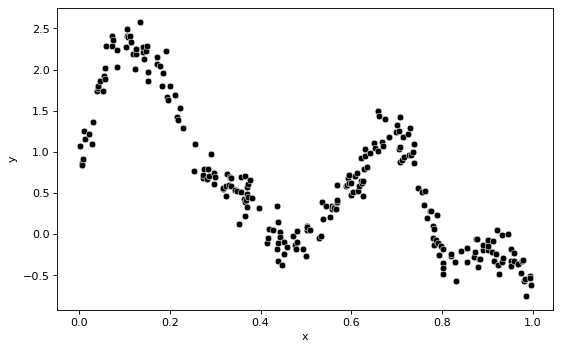

In [ ]:
d = pd.read_csv("gp.csv")
n = d.shape[0] # number of rows

sns.scatterplot(x='x', y='y', data=d, color="black")

---

### &diams; Exercise 1

Fit a linear regression model to these data, and create a plot of the regression line overlayed on the original data.

<AxesSubplot:xlabel='x', ylabel='y'>

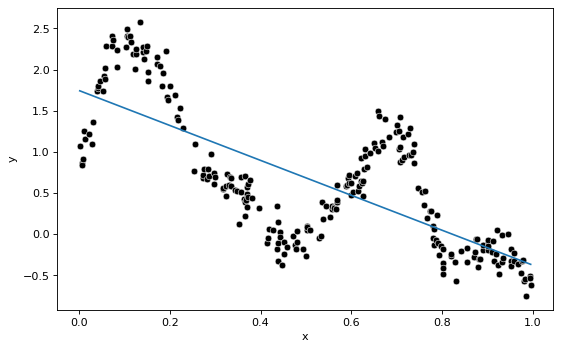

In [ ]:
X = np.c_[np.ones(n), d.x]
d["pred_lm"] = LinearRegression(fit_intercept = False).fit(X, d.y).predict(X)

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='pred_lm', data=d)

---

### &diams; Exercise 2

Calculate the mean squared error of your linear model's predictions. The function `mean_squared_error` from `sklearn.metrics` will be useful for this. See the functions documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(d.y, d.pred_lm)

0.30684493321337125

---

## 2. Polynomial Regression

Polynomial regression is a straight forward approach to capturing simple non-linear relationships between a feature and our response variable. At its core, polynomial regression amounts to the inclusion of additional columns in the model matrix that are powers of the feature of interest.

### 2.1 By hand

For a single feature and low order polynomials this is can be done by hand. For example, if we want to fit a quadratic model to these data we can do the following,

In [ ]:
y = d.y
X = np.c_[
    np.ones(n),
    d.x,
    d.x**2
]

l = LinearRegression(fit_intercept = False).fit(X,y)

print(l.coef_)

[ 1.96397561 -3.42899677  1.30199921]


Which gives us the following model for the data,

$$ \hat{y} = 1.96 - 3.43 x + 1.30 x^2 $$

The predictons of this model are then,

<AxesSubplot:xlabel='x', ylabel='y'>

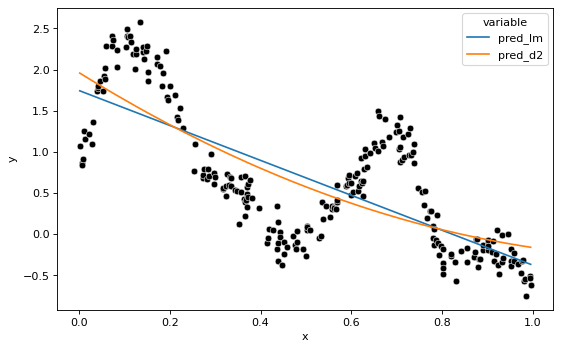

In [ ]:
d["pred_d2"] = l.predict(X)

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='value', hue="variable", data=pd.melt(d,id_vars=["x","y"]))

Note that the predicted values from this model form a curve rather than a straight line - specifically we have found the quadratic curve that best fits our data. We have used the pandas function `melt` to restructure our data frame, this is not strictly needed here but will be necessary for later examples. See the [pandas documentation on `melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) for futher details.

---

### &diams; Exercise 3

Calculate the mean square error of this quadratic polynomial model. How does it compare to the linear model we previously fit?

In [ ]:
mean_squared_error(d.y, d.pred_d2)

0.2969616424742076

This MSE is slightly better than the MSE for the linear model.

---

A cubic model can be similarly fit by adding a column containing $x^3$ to the previous model matrix (`X`). Note that by convention when fitting a polynomial model of degree $n$ we include all powers from $0$ to $n$, so for a cubic model our model matrix should include $x^0$, $x^1$, $x^2$, and $x^3$. 

In [ ]:
X = np.c_[X, d.x**3]
l = LinearRegression(fit_intercept = False).fit(X,y)

print(l.coef_)

[ 2.36985684 -8.49429068 13.95066369 -8.39215284]


This gives us a cubic model with the form,

$$
\hat{y} = 2.37 - 8.49 x + 13.9 x^2 - 8.39 x^3
$$

and predictons of this model are then,

<AxesSubplot:xlabel='x', ylabel='y'>

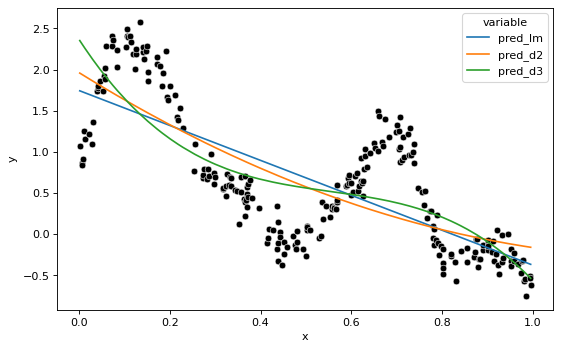

In [ ]:
d["pred_d3"] = l.predict(X)

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='value', hue="variable", data=pd.melt(d,id_vars=["x","y"]))

---

### &diams; Exercise 4

Calculate the mean square error of the cubic polynomial model. How does this model compare to your previous models?

In [ ]:
mean_squared_error(d.y, d.pred_d3)

0.27124908717801827

This is better still than the previous two MSEs.

---

### 2.2 sklearn and polynomial features

sklearn has a built in function called `PolynomialFeatures` which can be used to simplify the process of including polynomial features in a model. This function is included in the *preprocessing* module of sklearn, as with other python functions we can import it as follows.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Construction and use of this and other transformers is similar to what we have already seen with `LinearRegression`, we construct a `PolynomialFeatures` object in which we set basic options (e.g. the degree of the polynomial) and then apply the transformation to our data via `fit_transform` method. This will generate a new model matrix which includes the polynomial features up to the degree we have specified. 

To demonstrate the core features we will start with a toy example and then replicate the models we constructed in Section 2.1. Below we construct our sample data vector and then pass it into the transformer,

In [ ]:
x = np.array([1,2,3,4]) # Initial data

In [ ]:
#PolynomialFeatures(degree = 2).fit_transform(x)

When we run the above code we get an error because currently `x` is a 1D vector when the `fit_transform` function is expected a 2D array (the same will also happen with `LinearRegression`'s `fit` method). To solve this we need to make sure that the value we pass has the correct dimensions, `x.reshape(-1, 1)` is suggested by the error and corrects the issue.

In [ ]:
PolynomialFeatures(degree = 2).fit_transform(x.reshape(-1,1))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

Alternatively, we can alsu use the `np.c_` function to construct the matrix.

In [ ]:
PolynomialFeatures(degree = 2).fit_transform(np.c_[x]) # Order 2 polynomial model matrix for x

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [ ]:
PolynomialFeatures(degree = 3).fit_transform(np.c_[x]) # Order 3 polynomial model matrix for x

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

Note that when we use this transform we get all of the polynomial transformations of x from **0** to `degree`. In this case, the 0 degree column is equivalent to the intercept column. If for some reason we did not want to include this we can construct `PolynomialFeatures` with `include_bias=False`.

In [ ]:
PolynomialFeatures(degree = 3, include_bias=False).fit_transform(np.c_[x])

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We can now apply this to our original data by storing the result as `X` then passing this new model matrix to the linear regression fit method.

In [ ]:
X = PolynomialFeatures(degree = 3).fit_transform(np.c_[d.x])

l = LinearRegression(fit_intercept = False).fit(X,d.y)
print(l.coef_)

[ 2.36985684 -8.49429068 13.95066369 -8.39215284]


These values match those we obtained from the earlier cubic model, and we can also see this when plotting the model predictons.

<AxesSubplot:xlabel='x', ylabel='y'>

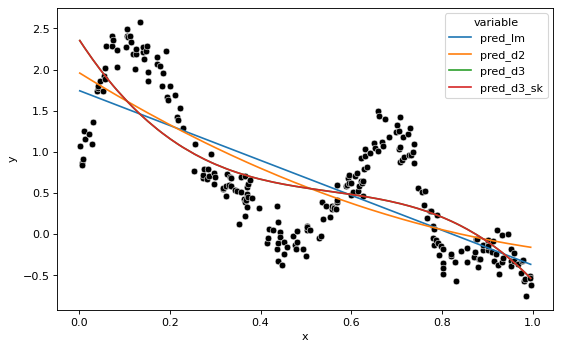

In [ ]:
d["pred_d3_sk"] = l.predict(X)

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='value', hue="variable", data=pd.melt(d,id_vars=["x","y"]))

We can not evensee the `pred_d3` line as it is being overplotted by the `pred_d3_sk` line.

### 2.3 Pipelines

You may have noticed that `PolynomialFeatures` takes a model matrix as input and returns a new model matrix as output which is then used as the input for `LinearRegression`. This is not an accident, and by structuring the library in this way sklearn is designed to enable the connection of these steps together, into what sklearn calls a *pipeline*.

We can modularize and simply our code somewhat by creating a pipeline that takes our original data, performs a polynomial feature transform and then feeds the results into a linear regression. We can accomplish this via the `make_pipeline` function from the `pipeline` module.



In [ ]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression()
)

print(poly_model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])


The resulting object represents a new "model" which can then be fit to data.

In [ ]:
p = poly_model.fit(np.c_[d.x], d.y)
print(p)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])


and used to create predictions just like our previous `LinearRegression` model.

<AxesSubplot:xlabel='x', ylabel='y'>

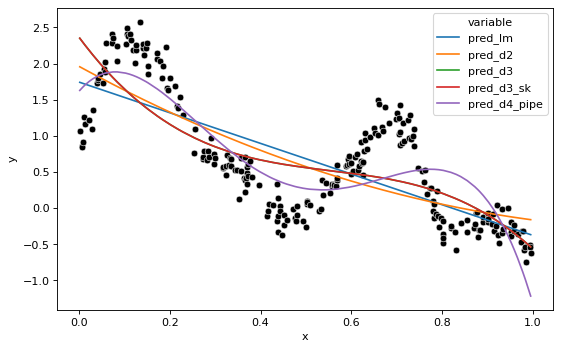

In [ ]:
d['pred_d4_pipe'] = p.predict(np.c_[d.x])

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='value', hue="variable", data=pd.melt(d,id_vars=["x","y"]))

The returned object is a `Pipeline` object so it will not provide direct access to step properties, such as the coefficients for the regression model.

In [ ]:
#print(p.coef_)

If we want access to the attributes or methods of a particular step we need to first access that step using either its name or position.

In [ ]:
print(p.named_steps['linearregression'].coef_)

[  0.           7.39051417 -57.67175293 102.72227443 -55.38181361]


In [ ]:
print(p.steps[1][1].intercept_) # second subset is necessary here because 
                                # each step is a tuple of a name and the 
                                # model / transform object 

1.6136636604768249


Also note that both the `'linearregression'` and `'polynomialfeatures'` step introduce a column of ones into the model matrix. This potentially introduces a rank deficiency in our model matrix, however sklearn handles this by fixing the coefficient of the duplicate intercept column to 0. The result however is that the intercept is now stored in `intercept_` and not `coef_`. If we wished to avoid this we would need to construct our pipeline using `LinearRegression(fit_intercept=False)`.

In [ ]:
p = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression(fit_intercept = False)
).fit(
    np.c_[d.x],
    d.y
)

print(p.named_steps['linearregression'].coef_)
print(p.named_steps['linearregression'].intercept_)

[  1.61366366   7.39051417 -57.67175293 102.72227443 -55.38181361]
0.0


### 2.4 Putting it all together

So far each time we've wanted to fit a polynomial regression model we've had to set up the various data objects and then create the sklearn model and transformation objects and then get a final result of the coefficients or a plot - because of this the preceeding cells contain a lot of duplicated code which is something we should be trying to avoid. 

Our modeling task here is like many other programming tasks, when we find ourselves reusing the same code over and over it is time to consider writing a function. Below I have implemented a function called `poly_reg` that allows the user to provide a data frame and specific the names of the `x` column an d `y` column as well as the degree of the polynomial we would like to fit. The function returns the original data frame with the model predictions added as well as the model coefficients in a tuple.

In [ ]:
def poly_reg(data, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit = True):
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
    )
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_d'+str(degree)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(x=data[x], y=data[y], color="black")

    if plot_fit:
        sns.lineplot(x=data[x], y=data[pred_col])
    
    return (data, m.steps[1][1])

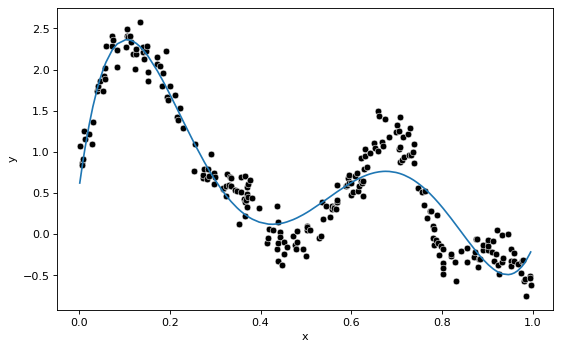

In [ ]:
_, _ = poly_reg(d, degree=5)

Since we are not using either the data frame or model coefficients we unpack them into `_`.

---

### &diams; Exercise 5

Use the `poly_reg` function to fit a variety of different polynomial models to the data. What values of `degree` provides the best fit (judged qualitatively not quantitatively).

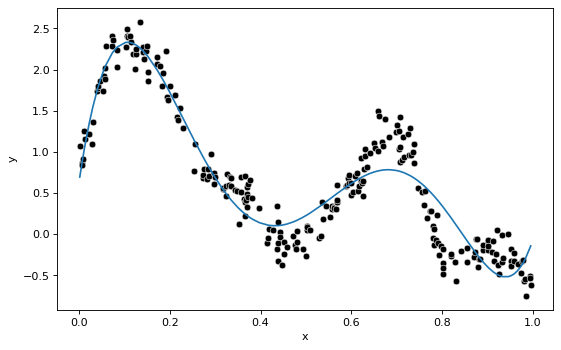

In [ ]:
_ = poly_reg(d, degree=6)

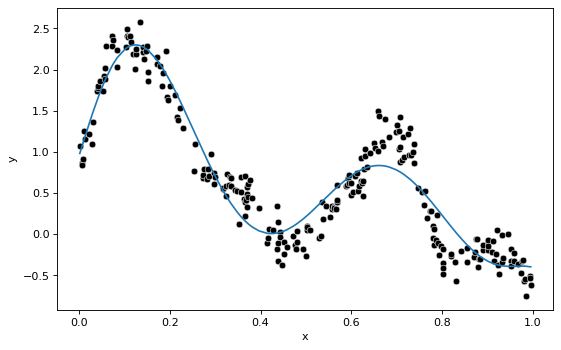

In [ ]:
_ = poly_reg(d, degree=7)

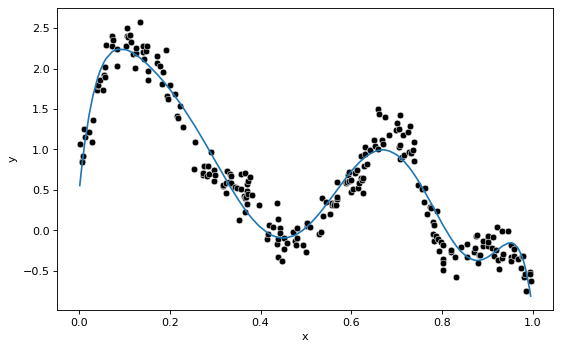

In [ ]:
_ = poly_reg(d, degree=8)

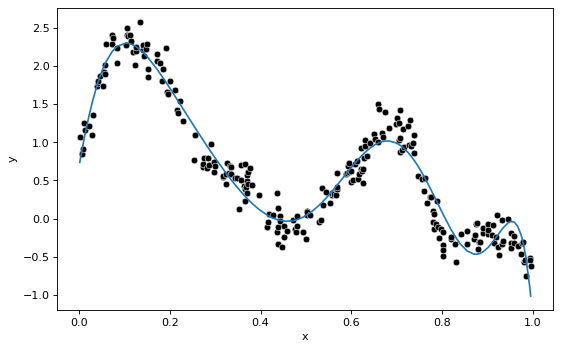

In [ ]:
_ = poly_reg(d, degree=9)

As we increase the degrees of the polynomial the model appears to fit the data better, there also appears to be some diminishing returns as the degree gets larger.

---

### &diams; Exercise 6

In the cell below we have provided a copy of the `poly_reg` function, modify this function such that it returns a 3rd value that is the mean square error of the predictions for the model. Check that the value returned by the function matches the MSE you calculated in **Exercises 2-4**.

In [ ]:
def poly_reg_mse(data, x = 'x', y = 'y', degree=1, plot_data = True, plot_fit = True):
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(fit_intercept=False)
    )
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_d'+str(degree)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(data[x],data[y], color="black")

    if plot_fit:
        sns.lineplot(data[x],data[pred_col])
    
    # Only the line below needs to change
    return (data, m.steps[1][1], mean_squared_error(data[y], data[pred_col]))

Below are three calls to this function which report these MSE values.

In [ ]:
_, _, mse_d1 = poly_reg_mse(d, degree=1, plot_data=False, plot_fit=False)
_, _, mse_d2 = poly_reg_mse(d, degree=2, plot_data=False, plot_fit=False)
_, _, mse_d3 = poly_reg_mse(d, degree=3, plot_data=False, plot_fit=False)


print("deg=1:", mse_d1)
print("deg=2:", mse_d2)
print("deg=3:", mse_d3)

deg=1: 0.30684493321337125
deg=2: 0.2969616424742076
deg=3: 0.27124908717801827


---

### &diams; Exercise 7

Construct a data frame called `poly_res` with the columns `degree` and `mse`. `degree` should contain the integer values 1 to 20 and `mse` should contain the mean squared errors, calculated using the function `poly_reg_mse`, for each of the different `degree` values.

In [ ]:
poly_res = pd.DataFrame(
    {'degree': range(1,21)}
).assign(
    mse = lambda x: [ poly_reg_mse(d, degree=i, plot_data=False, plot_fit=False)[2] for i in x.degree]
)

poly_res

,degree,mse
0,1,0.306845
1,2,0.296962
2,3,0.271249
3,4,0.203277
4,5,0.077071
5,6,0.076422
6,7,0.067818
7,8,0.047326
8,9,0.043203
9,10,0.031921


---

### &diams; Exercise 8

Create a plot of `degree` vs. `mse` using the `poly_res` data frame you created above. Based on this comment on what model appears to best fit the data. 

<AxesSubplot:xlabel='degree', ylabel='mse'>

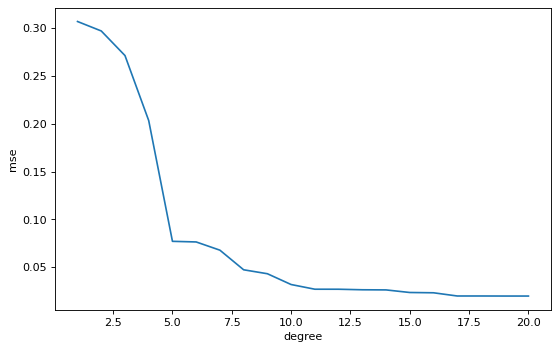

In [ ]:
sns.lineplot(x="degree", y="mse", data=poly_res)

Based on this plot it seems that the MSE gets smaller as the degree increases, however after around a degree of 10 the improvements are quite small.

---

### &diams; Exercise 9

Based on your findings in the preceding exercises, can we find the "optimal model" using this kind of approach? Explain why or why not.

The optimal model would appear to be a model with the largest possible degree, but this risks issues of overfitting.

---

## 3. Regression Trees (via feature engineering)

Later in this course we will be covering proper regression tree models, including the algorithms for fitting them. For today we will be exploring a simplified version of these models as a way of further exploring feature engineering via sklearn's feature transformers and pipelines.

Here we will consider a simple basis function of the form,

$$
f_j(x; a_j,b_j) = \begin{cases}
1 & \text{if $a_j \leq x < b_j$} \\
0 & \text{otherwise}
\end{cases}
$$

This reflects one possible basis function that we might choose to better fit our data. In order to use these functions to transform our data, we will need to choose the values of $a$ and $b$ as well as the number of basis functions to use $M$. Given those choices our goal is to then to fit the model,

$$
y_i = \beta_1 f(x_i; a_1,b_1) + \beta_2 f(x_i; a_2,b_2) + \ldots +  \beta_M f(x_i; a_M,b_M) 
$$

---

### &diams; Exercise 10

Explain why we are not able to directly use the least squares approach to find optimal values of $a$, $b$, and $M$ to fit our data.

Using least squares we are only able to solve for parameters that are a *linear function* of our features. For this model this is only true of the $\beta$s but not $a$, $b$, and $M$ - we can try fitting different models with different values of these, but the naive parameter space is too large to be practically searched.

---

### 3.1 With pandas

For our example today, we will keep things simple and divide our `x` values up into 11 equal sized pieces: $[0,0.1)$, $[0.1,0.2)$, $\ldots$, $[0.9,1)$. This can be achieved using pandas' `cut` function as follows, 

In [ ]:
d = pd.read_csv("gp.csv") # Get a clean copy of the data

d["x_bin"] = pd.cut(d.x, np.linspace(0,1,11))
print(d)

            x         y       x_bin
0    0.002189  1.070772  (0.0, 0.1]
1    0.006209  0.863336  (0.0, 0.1]
2    0.006764  0.846165  (0.0, 0.1]
3    0.009349  0.916748  (0.0, 0.1]
4    0.012407  1.258828  (0.0, 0.1]
..        ...       ...         ...
245  0.982005 -0.540678  (0.9, 1.0]
246  0.983324 -0.751002  (0.9, 1.0]
247  0.992081 -0.510908  (0.9, 1.0]
248  0.993567 -0.537508  (0.9, 1.0]
249  0.994654 -0.621642  (0.9, 1.0]

[250 rows x 3 columns]


`np.linspace` is used here to specify the cut points and returns the array `[0,0.1,...,0.9,1]`. The results new column `x_bin` now contains a categorical variable for the interval containing the `x` value for that row. 

We can then use pandas' `get_dummies` to transform this categorical variable using one hot encoding. After brief examination you should be able to see that this is equivalent applying the 11 basis functions (columns) to each of the `x` values (rows) using the ranges we've described.

In [ ]:
pd.get_dummies(d.x_bin)

,"(0.0, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,1
246,0,0,0,0,0,0,0,0,0,1
247,0,0,0,0,0,0,0,0,0,1
248,0,0,0,0,0,0,0,0,0,1


We can then fit a linear regression model using only these dummy variable and obtain the following model fit,

In [ ]:
X = pd.get_dummies(d.x_bin)
y = d.y

l = LinearRegression(fit_intercept=False).fit(X,y)
d["pred_M11"] = l.predict(X)

<AxesSubplot:xlabel='x', ylabel='y'>

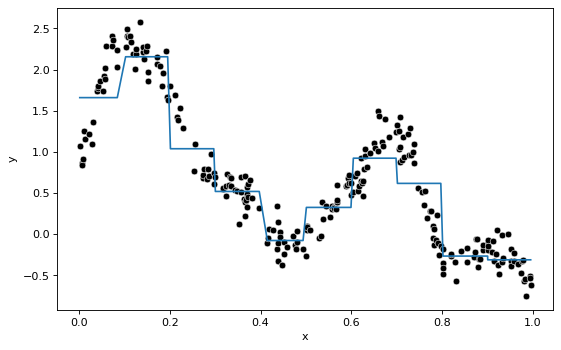

In [ ]:
sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='pred_M11', data=d)

---

### &diams; Exercise 11

Calculate the mean squared error of this model. How does it compare to the polynomial models we fit previously?

In [ ]:
mean_squared_error(d.y, d.pred_M11)

0.0985882258438611

This model performs reasonably well, it is competative with polynomial models with degree $<5$.

---

### &diams; Exercise 12

Repeat this fitting procedure, but vary the number of bins being used (by changing the 3rd parameter in `np.linspace`). How does the MSE compare to the previous models?

0.03245514022311238

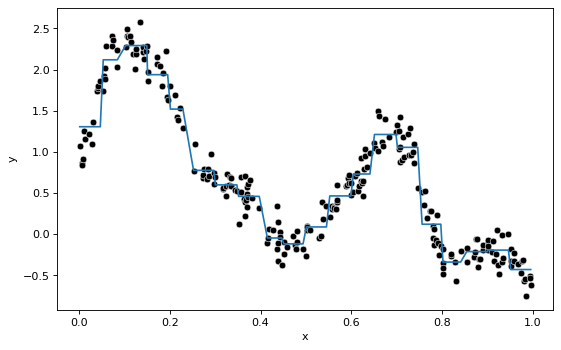

In [ ]:
X = pd.get_dummies(pd.cut(d.x, np.linspace(0,1,21)))
d["pred_M21"] = LinearRegression(fit_intercept=False).fit(X,d.y).predict(X)

sns.scatterplot(x='x', y='y', data=d, color="black")
sns.lineplot(x='x', y='pred_M21', data=d)

mean_squared_error(d.y, d.pred_M21)

Increasing the number of bins improves the model fit.

---

### 3.2 With sklearn

A similar process can be achieved with sklearn's `KBinsDiscretizer` from the *preprocessing* submodule. 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

The key arguments for this transformer are `n_bins` which determines the number of bins, `encode` which determines how the transformed values are encoded, and `strategy` which is used to determine bin widths. To (almost) replicate our results from pandas we will use `strategy="uniform"` and `encode="onehot-dense"`.

In [ ]:
kb_disc = KBinsDiscretizer(n_bins=10, strategy="uniform", encode="onehot-dense")
kb_disc

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

We can examine where the transformer has selected the bin edges to be located by calling the fit method on our features and then printing the `bin_edges_` attribute.

In [ ]:
X = np.c_[d.x]
kb_disc.fit(X).bin_edges_

array([array([0.00218943, 0.10143587, 0.20068231, 0.29992875, 0.39917519,
       0.49842163, 0.59766807, 0.69691451, 0.79616095, 0.89540739,
       0.99465383])], dtype=object)

These cut points differ slightly from those we obtained from pandas, this is happening because we are using the data to derive the cut points and since the `x` values are randomly generated the data does not begin exactly at 0 and end at 1.

If we want to match pandas exactly, we can provide new data which is used to fit the transformer and then apply that to our data using the `transform` later.

In [ ]:
x_range = np.array([0,1])
kb_disc.fit(x_range.reshape(-1,1)).bin_edges_

array([array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])],
      dtype=object)

To obtain the transformed feature, we need to call `transform` with the feature to transform.

In [ ]:
kb_disc.fit(x_range.reshape(-1,1)).transform(X)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

If instead we used `fit_transform` we will get the bin edges from the first example above, this will be the default behavior of the transformer if we use it in a pipeline.

In [ ]:
kb_disc.fit_transform(X)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

The two data frames above look similar, but are very slightly different due to the different bin edges used.

Just like our polynomial regression model, we can combine this transformed with the model using a pipeline. This combined with some plotting and diagnostic code is below.

In [ ]:
def reg_tree(data, x = 'x', y = 'y', 
             n_bins=10, strategy = "uniform",
             x_range = np.array([0,1]),
             plot_data = True, plot_fit = True):
    
    X = np.c_[data[x]]
    Y = data[y]
    
    p = make_pipeline(
        KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode="onehot-dense"),
        LinearRegression(fit_intercept=False) # Since we are using onehot above we 
    )                                         # need to remove the intercept here
    
    m = p.fit(X,Y)
    
    pred_col = 'pred_rt_M'+str(n_bins)
    data[pred_col] = m.predict(X)

    if plot_data:
        sns.scatterplot(x=data[x], y=data[y], color="black")

    if plot_fit:
        sns.lineplot(x=data[x], y=data[pred_col])
    
    return (data, m)

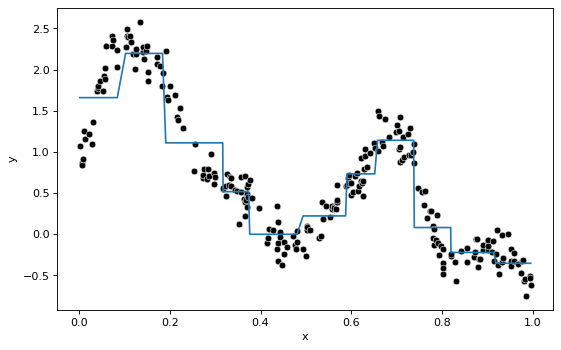

In [ ]:
_, _  = reg_tree(d, n_bins=11, strategy="quantile")

---

### &diams; Exercise 13

Use the `reg_tree` function to fit a variety of different discretized models to the data. What value of `n_bins` provides the best fit (judged qualitatively not quantitatively).

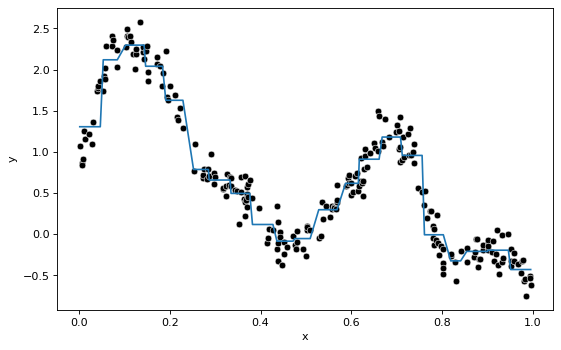

In [ ]:
_,_ = reg_tree(d, n_bins=21)

Inceasing the number of bins gives the model more flexibility and hence seems to fit the data better.

---

### &diams; Exercise 14

Based on what you've seen in Exercise 13, how do you think the quality of fit changes as `n_bins` increases?

Inceasing the number of bins improves the overall model fit.

---

## 3. Competing the worksheet

At this point you have hopefully been able to complete all the preceeding exercises. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF and turn it in on gradescope under the `mlp-week03` assignment.

In [ ]:
!jupyter nbconvert --to pdf mlp-week03.ipynb 

[NbConvertApp] Converting notebook mlp-week03.ipynb to pdf
[NbConvertApp] Support files will be in mlp-week03_files/
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Making directory ./mlp-week03_files
[NbConvertApp] Writing 92029 bytes to notebook.tex
[NbConvertApp] B